In [1]:
import nltk

In [6]:
with open("cnn.txt", encoding='UTF-8') as f:
    data = f.read()

In [7]:
data

'Russia\'s war in Ukraine\nFires extinguished after missile strikes in Odesa, with one person killed\nFrom Tim Lister and Julia Presniakova \n\nAftermath of Russian strikes on Odesa, Ukraine, on May 10.\nAftermath of Russian strikes on Odesa, Ukraine, on May 10. (Odessa City/Telegram)\nFires caused by missile strikes in the southern Ukrainian city of Odesa have been extinguished, said the country\'s State Emergency Service on Monday night.\n\nOdesa came under heavy attack on Monday, with cruise missiles — including Russia\'s new hypersonic Kinzhal missiles — destroying two hotels, a shopping center and a warehouse, officials said.\n\nOne person died and five were hospitalized, according to Ukrainian officials. Detailed information on other injuries and possible victims is still being clarified, they said.\n\nThe hypersonic missile: The new Khinzal missile had its combat debut at the beginning of the war, and has only been used once before, according to Western intelligence sources. It 

In [8]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [11]:
print(sent_tokenize(data[:1000])[1])

Aftermath of Russian strikes on Odesa, Ukraine, on May 10.


In [12]:
word_tokenize(data[50:100])

['issile',
 'strikes',
 'in',
 'Odesa',
 ',',
 'with',
 'one',
 'person',
 'killed',
 'Fr']

In [13]:
from nltk.tokenize import RegexpTokenizer

In [14]:
retokenize = RegexpTokenizer('[\w]+') # 글자만 추출하기 위한 정규식
retokenize.tokenize(data[50:100])

['issile', 'strikes', 'in', 'Odesa', 'with', 'one', 'person', 'killed', 'Fr']

In [16]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tag import pos_tag

In [17]:
tagged_list = pos_tag(word_tokenize(data))

In [18]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list[:100]

['war',
 'missile',
 'person',
 'Aftermath',
 'missile',
 'city',
 'country',
 'night',
 'attack',
 'cruise',
 'shopping',
 'center',
 'warehouse',
 'person',
 'information',
 'missile',
 'missile',
 'combat',
 'debut',
 'beginning',
 'war',
 'intelligence',
 'payload',
 'damage',
 'city',
 'devastation',
 'missile',
 'strike',
 'district',
 'set',
 'fire',
 'area',
 'square',
 'context',
 'area',
 'uptick',
 'week',
 'surface',
 'aircraft',
 'min',
 'presence',
 'border',
 'serviceman',
 'shell',
 'mortar',
 'region',
 'serviceman',
 'shell',
 'mortar',
 'region',
 'military',
 'presence',
 'border',
 'city',
 'military',
 'enemy',
 'air',
 'defense',
 'region',
 '[',
 ']',
 'readiness',
 'mode',
 'defense',
 'order',
 'advance',
 'state',
 'border',
 'city',
 'border',
 'region',
 'enemy',
 'state',
 'border',
 '[',
 'order',
 'armed',
 'south',
 'supply',
 'movement',
 'week',
 'video',
 'village',
 'border',
 'authenticity',
 'video',
 'artillery',
 'rocket',
 'fire',
 'border',
 '

In [19]:
from nltk import Text

In [20]:
text = Text(retokenize.tokenize(data))
text

<Text: Russia s war in Ukraine Fires extinguished after...>

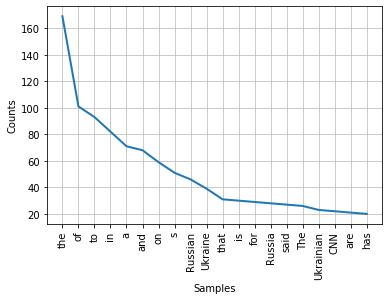

In [23]:
text.plot(20)

In [24]:
from nltk import FreqDist

In [25]:
data_tokens = pos_tag(retokenize.tokenize(data))
fd_names = FreqDist(data_tokens)
fd_names.most_common(10)

[(('the', 'DT'), 169),
 (('of', 'IN'), 101),
 (('to', 'TO'), 93),
 (('in', 'IN'), 82),
 (('a', 'DT'), 71),
 (('and', 'CC'), 68),
 (('on', 'IN'), 59),
 (('Ukraine', 'NNP'), 38),
 (('Russian', 'JJ'), 34),
 (('is', 'VBZ'), 30)]

In [26]:
stopwords = ["and", "the", "of", "to", "in", "a", 'is', 'for']
data_tokens2 = [w[0] for w in data_tokens if w[1] == "NNP" and w[0] not in stopwords]

In [27]:
fd_names2=FreqDist(data_tokens2)

In [28]:
fd_names2.most_common(10)

[('Ukraine', 38),
 ('Russia', 28),
 ('CNN', 22),
 ('Putin', 20),
 ('Odesa', 17),
 ('May', 13),
 ('Russian', 12),
 ('Monday', 12),
 ('Kharkiv', 11),
 ('NATO', 10)]

In [29]:
import matplotlib .pyplot as plt
from wordcloud import WordCloud

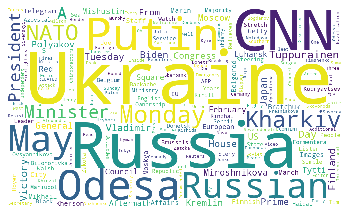

In [30]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names2))
plt.axis("off")
plt.show()